# BIONIC Methods Tests and Data Visualization

## Exploration and Gene Filtering

In [1]:
# imports
from itertools import combinations
import numpy as np
import pandas as pd
import csv
# import pearsonr as pearsonr
# from scipy.stats import pearsonr
from matplotlib import pyplot as plt

In [2]:
#File Read
df = pd.read_csv("../outputs/locus_tag_processed.csv", sep=',', index_col=0, header=0)
df

,35D-0H-16C-A,35D-0H-16C-B,35D-2H-16C-A,37D-2H-16C-B,40D-5H-16C-A,40D-5H-16C-B,44D-9H-16C-A,44D-9H-16C-B,37D-2H-25C-A,37D-2H-25C-B,40D-5H-25C-A,40D-5H-25C-B,44D-9H-25C-A,44D-9H-25C-B
probe_name,,,,,,,,,,,,,,
AT2G42240,110.0,95.2,91.1,133.4,97.2,121.3,85.2,125.7,92.9,127.4,92.7,102.4,102.5,112.5
AT2G42250,28.5,27.2,34.2,29.3,28.4,30.5,18.5,24.6,26.7,12.0,42.5,35.3,21.9,31.7
AT2G42270,87.8,89.8,72.2,83.4,86.0,85.2,108.0,66.4,91.0,94.6,98.6,76.5,81.6,86.3
AT2G42280,42.5,35.0,21.2,30.5,17.1,14.4,19.8,1.2,41.7,31.1,21.2,17.3,18.2,12.3
AT2G42120,262.4,282.2,248.7,266.0,209.7,235.3,204.1,289.5,228.7,213.9,248.7,275.3,233.3,246.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257585_at,4.0,6.4,5.8,9.2,1.8,1.9,17.7,2.8,8.3,2.0,4.0,10.6,5.5,1.8
AT1G50760,3.9,8.8,13.0,6.1,13.8,31.0,12.8,0.5,9.4,22.8,14.7,5.5,27.7,1.5
AT1G56310,153.5,148.0,78.4,112.0,97.2,114.7,109.8,112.8,93.4,105.7,101.7,91.2,89.2,81.6


### Pre-processes the probe names
Pre-processed the gene expression data, separating the probe names and removing the probes from organs (ATC and ATM).

In [28]:
# with open('reduced_output.csv', 'r') as file:
#     reader = csv.reader(file)
#     header = next(reader)
#     new_rows = []
#
#     for row in reader:
#         probe_names = [row[0][i:i+9] for i in range(0, len(row[0]), 9)]
#
#         # Filter out probes from organs (ATC and ATM)
#         probe_names = [probe for probe in probe_names if not probe.startswith('ATC') and not probe.startswith('ATM')]
#
#         # Remove ATM and ATC from the list of probe names if they are aliases
#         for i in range(len(probe_names)):
#             if probe_names[i] == 'ATC' or probe_names[i] == 'ATM':
#                 probe_names.pop(i)
#
#         new_row = [';'.join(probe_names)] + row[1:]
#         new_rows.append(new_row)
#
# with open('reduced_output.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(header)
#     writer.writerows(new_rows)

###  Map probe names to gene symbols
Map the probe names to gene symbols.

In [29]:
# import pandas as pd
#
# def map_probes_to_genes(input_file, mapping_file):
#     # Read the mapping file and create a dictionary mapping probe names to gene symbols
#     probe_to_gene = {}
#     with open(mapping_file, 'r') as map_file:
#         for line in map_file:
#             probe, gene = line.strip().split()
#             probe_to_gene[probe] = gene
#
#     # Read in the input file as a DataFrame
#     input_df = pd.read_csv(input_file)
#
#     # Map the gene symbols for each probe name
#     gene_symbols = []
#     for probe_name in input_df['probe_name']:
#         if probe_name in probe_to_gene:
#             gene_symbols.append(probe_to_gene[probe_name])
#         else:
#             gene_symbols.append(probe_name)
#
#     # Replace the "probe_name" column with "gene_symbol"
#     input_df['gene_symbol'] = gene_symbols
#     input_df = input_df.drop(columns=['probe_name'])
#     input_df = input_df.set_index('gene_symbol')
#
#     # Write the output file
#     input_df.to_csv('../outputs/genesym.csv')
#
# map_probes_to_genes('reduced_output.csv', '../gene_mapping/gene_symbol_mapping.txt')

## Scaling and Filtering

In [3]:
#File Read
df = pd.read_csv("../outputs/gene_symbol_processed.csv", sep=',', index_col=0, header=0)
df

,35D-0H-16C-A,35D-0H-16C-B,35D-2H-16C-A,37D-2H-16C-B,40D-5H-16C-A,40D-5H-16C-B,44D-9H-16C-A,44D-9H-16C-B,37D-2H-25C-A,37D-2H-25C-B,40D-5H-25C-A,40D-5H-25C-B,44D-9H-25C-A,44D-9H-25C-B
gene_symbol,,,,,,,,,,,,,,
AT2G42240,110.0,95.2,91.1,133.4,97.2,121.3,85.2,125.7,92.9,127.4,92.7,102.4,102.5,112.5
AT2G42250,28.5,27.2,34.2,29.3,28.4,30.5,18.5,24.6,26.7,12.0,42.5,35.3,21.9,31.7
AT2G42270,87.8,89.8,72.2,83.4,86.0,85.2,108.0,66.4,91.0,94.6,98.6,76.5,81.6,86.3
AT2G42280,42.5,35.0,21.2,30.5,17.1,14.4,19.8,1.2,41.7,31.1,21.2,17.3,18.2,12.3
AT2G42120,262.4,282.2,248.7,266.0,209.7,235.3,204.1,289.5,228.7,213.9,248.7,275.3,233.3,246.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257585_at,4.0,6.4,5.8,9.2,1.8,1.9,17.7,2.8,8.3,2.0,4.0,10.6,5.5,1.8
NLP1,3.9,8.8,13.0,6.1,13.8,31.0,12.8,0.5,9.4,22.8,14.7,5.5,27.7,1.5
TPS10,153.5,148.0,78.4,112.0,97.2,114.7,109.8,112.8,93.4,105.7,101.7,91.2,89.2,81.6


In [4]:
# Check the value ranges of the expression values for each conditions
grouped_data = df.groupby(df.columns, axis=1)
grouped_data.describe()

,,count,mean,std,min,25%,50%,75%,max
35D-0H-16C-A,35D-0H-16C-A,22553.0,275.946020,697.108922,0.0,17.8,78.4,250.6,11717.7
35D-0H-16C-B,35D-0H-16C-B,22553.0,266.573037,630.579840,0.0,15.8,81.3,255.6,9982.1
35D-2H-16C-A,35D-2H-16C-A,22553.0,274.251581,680.855354,0.0,20.1,83.2,252.4,11184.2
37D-2H-16C-B,37D-2H-16C-B,22553.0,268.955412,648.300507,0.0,16.2,83.0,252.4,9832.8
37D-2H-25C-A,37D-2H-25C-A,22553.0,271.357150,660.357147,0.0,20.3,87.9,256.1,11547.8
37D-2H-25C-B,37D-2H-25C-B,22553.0,269.751080,659.436351,0.1,16.7,86.4,255.3,10688.8
40D-5H-16C-A,40D-5H-16C-A,22553.0,271.262497,657.703709,0.0,16.0,81.3,256.2,10244.4
40D-5H-16C-B,40D-5H-16C-B,22553.0,271.353314,668.348653,0.0,19.8,84.4,250.9,10996.7
40D-5H-25C-A,40D-5H-25C-A,22553.0,270.113759,652.476525,0.1,20.6,87.8,258.6,11045.5
40D-5H-25C-B,40D-5H-25C-B,22553.0,270.886463,670.787552,0.2,18.3,85.3,255.7,11509.6


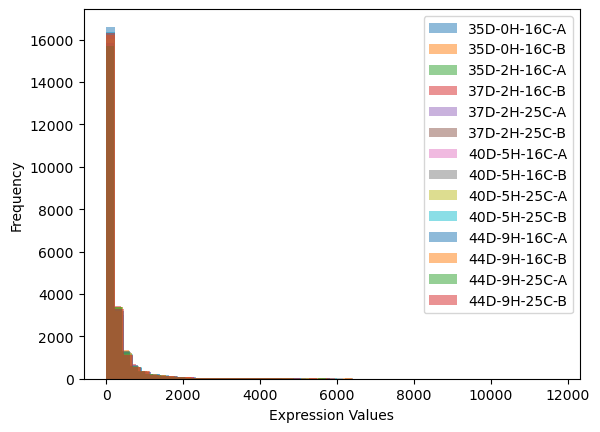

In [5]:
# Plot distribution of expression values for each condition

for sample, group in grouped_data:
    plt.hist(group[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.legend()

plt.show()

### Separate datasets by conditions

In [16]:
# Separate dataset by temperatures
sixteen_df = df.iloc[:, :8]
sixteen_df.to_csv("../outputs/sixteen_df.csv")
twenty_five_df = df.iloc[:, 8:16]
twenty_five_df.to_csv("../outputs/twenty_five_df.csv")

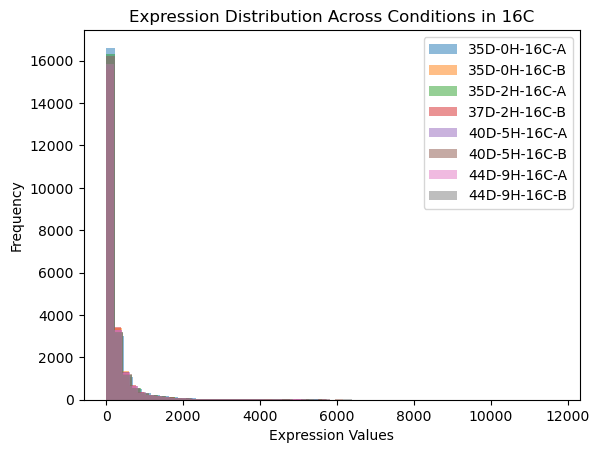

In [105]:
# Expression distribution across conditions in 16C
grouped_sixteen = sixteen_df.groupby(sixteen_df.columns, axis=1)

for sample, condition in grouped_sixteen:
    plt.hist(condition[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.title("Expression Distribution Across Conditions in 16C")
plt.legend()

plt.show()

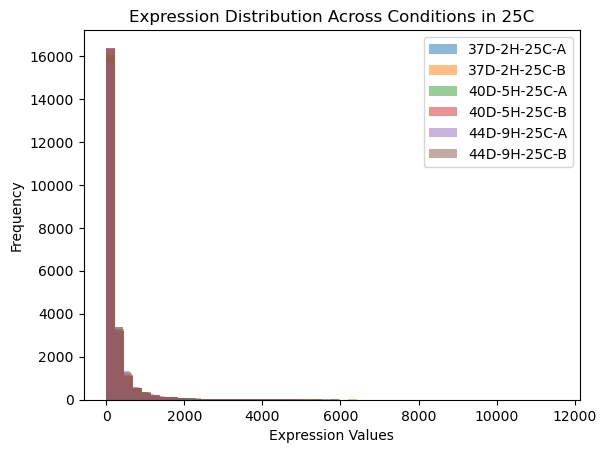

In [106]:
# Expression distribution across conditions in 25C
grouped_twenty_five = twenty_five_df.groupby(twenty_five_df.columns, axis=1)

for sample, condition in grouped_twenty_five:
    plt.hist(condition[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.title("Expression Distribution Across Conditions in 25C")
plt.legend()

plt.show()

### Filter by Coefficient of Variation

In [35]:
# Calculate CoV for 16C
sixteen_df = pd.read_csv("../outputs/sixteen_df.csv", index_col='gene_symbol')

# Calculate the mean and standard deviation for each gene
sixteen_mean = sixteen_df.mean(axis=1)
sixteen_std = sixteen_df.std(axis=1)

# Calculate the coefficient of variation for each gene
sixteen_cv = (sixteen_std / sixteen_mean) * 100

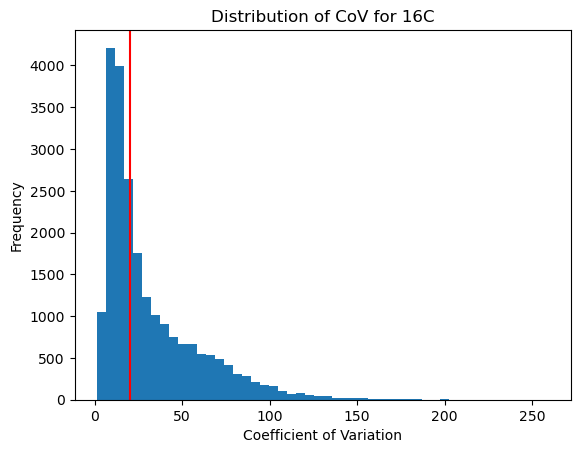

In [36]:
# Visualize CoV
plt.hist(sixteen_cv, bins=50)
plt.xlabel("Coefficient of Variation")
plt.ylabel("Frequency")
plt.title("Distribution of CoV for 16C")
plt.axline((20, 0), (20, 100), color='r')
plt.show()

In [32]:
# Filter out genes with a CV below 25%
threshold = 20
filtered_sixteen_genes = sixteen_cv[sixteen_cv >= threshold].index.tolist()
filtered_sixteen_df = sixteen_df.loc[filtered_sixteen_genes, :]
print(len(filtered_sixteen_genes))

11644


In [37]:
# Calculate CoV for 25C
twenty_five_df = pd.read_csv("../outputs/twenty_five_df.csv", index_col='gene_symbol')

# Calculate the mean and standard deviation for each gene
twenty_five_mean = twenty_five_df.mean(axis=1)
twenty_five_std = twenty_five_df.std(axis=1)

# Calculate the coefficient of variation for each gene
twenty_five_cv = (twenty_five_std / twenty_five_mean) * 100

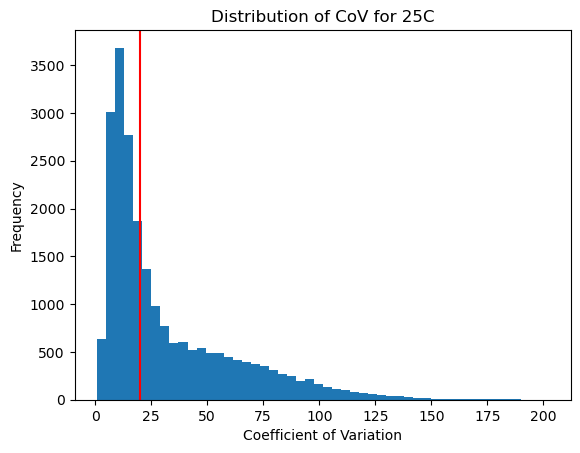

In [39]:
# Visualize CoV
plt.hist(twenty_five_cv, bins=50)
plt.xlabel("Coefficient of Variation")
plt.ylabel("Frequency")
plt.title("Distribution of CoV for 25C")
plt.axline((20, 0), (20, 100), color='r')
plt.show()

In [40]:
# Filter out genes with a CV below 25%
threshold = 20
filtered_sixteen_genes = twenty_five_cv[twenty_five_cv >= threshold].index.tolist()
filtered_sixteen_df = twenty_five_df.loc[filtered_sixteen_genes, :]
print(len(filtered_sixteen_genes))

11054


### Filter by Mean Absolute Deviation

In [74]:
# Calculate MAD for each gene in 16C

sixteen_mad = np.mean(np.abs(sixteen_df - sixteen_df.mean()), axis=1)
sixteen_median_mad = np.median(sixteen_mad)

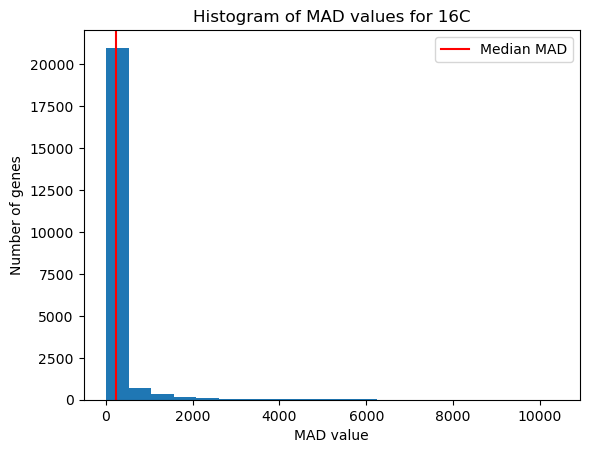

In [86]:
# Visualize MAD values
plt.hist(sixteen_mad, bins=20)
plt.axvline(x=sixteen_median_mad, color='red', linestyle='-', label='Median MAD', )
plt.xlabel('MAD value')
plt.ylabel('Number of genes')
plt.title('Histogram of MAD values for 16C')
plt.legend()
plt.show()

In [97]:
# Filter out by the median of the MAD value
threshold = 0.8 * sixteen_median_mad
filtered_sixteen_mad = sixteen_df.loc[sixteen_mad >= threshold, :]
print(len(filtered_sixteen_mad))

14425


In [98]:
# Calculate MAD for each gene in 25C

twenty_five_mad = np.mean(np.abs(twenty_five_df - twenty_five_df.mean()), axis=1)
twenty_five_median_mad = np.median(twenty_five_mad)

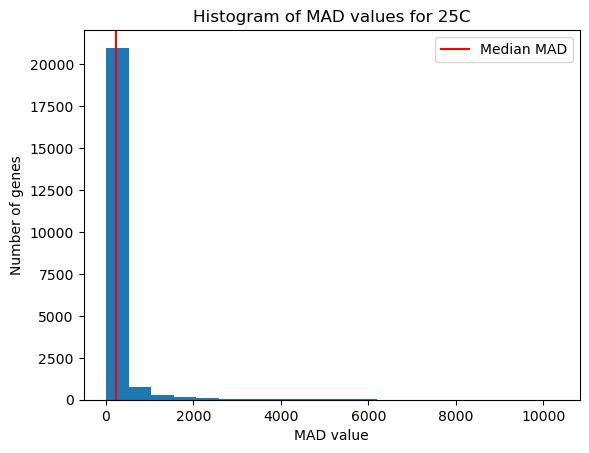

In [99]:
# Visualize MAD values for 25C
plt.hist(twenty_five_mad, bins=20)
plt.axvline(x=twenty_five_median_mad, color='red', linestyle='-', label='Median MAD', )
plt.xlabel('MAD value')
plt.ylabel('Number of genes')
plt.title('Histogram of MAD values for 25C')
plt.legend()
plt.show()

In [101]:
# Filter out by the median of the MAD value
threshold = 0.8 * twenty_five_median_mad
filtered_twenty_five_mad = twenty_five_df.loc[twenty_five_mad >= threshold, :]
print(len(filtered_twenty_five_mad))

14259


## Scale filtered dataset

In [ ]:
# Scale values by individual samples
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.T)
scaled_df = pd.DataFrame(scaled_df, columns=df.index, index=df.columns)

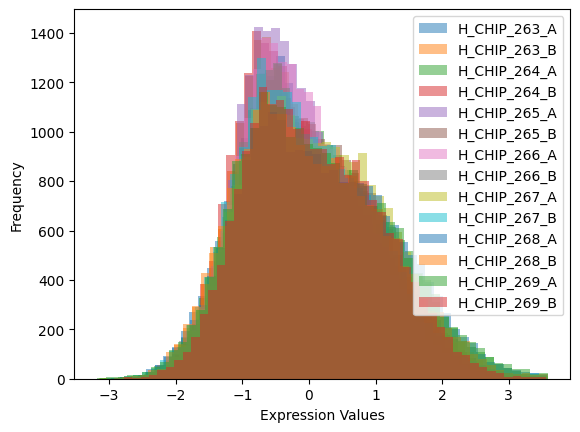

In [23]:
# Plot distribution of expression values for each condition after scaling
grouped_scl_data = scaled_df.T.groupby(scaled_df.T.columns, axis=1)
for sample, group in grouped_scl_data:
    plt.hist(group[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [31]:
# Create a new dataframe with the filtered genes
filtered_df_2.T.to_csv("reduced_output_corrected.csv")
corrected = filtered_df_2.T

In [36]:
# Split the index strings by semicolon and keep only the first part [kept only the first gene name]
corrected.index = corrected.index.str.split(';').str[0]
corrected.to_csv("reduced_output_corrected.csv")

In [17]:
# corrected.columns

In [62]:
expression_data_df = pd.read_csv("reduced_output_corrected.csv", sep=',', index_col=0, header=0)
expression_data_df.to_csv("reduced_output_corrected.csv")

In [63]:
# Delete repetitive genes
expression_data_df = expression_data_df.loc[~expression_data_df.index.duplicated(keep='first')]
expression_data_df.to_csv("reduced_output_corrected.csv")

## Old thresholding Approach

In [19]:
# Check variance of each gene across all samples
df.T.values.var(axis=0)

array([222.10209184,  51.52392857, 103.59102041, ..., 450.27632653,
        51.20637755,  77.43637755])

In [20]:
# Check the number of genes with variance above the threshold
variance_threshold = 10000
variance = df.T.values.var(axis=0)
count_var = len(variance[variance > variance_threshold])
count_var

1994

In [21]:
# Keep only the genes with variance above the threshold
reduced_df = df.T.loc[:, variance > variance_threshold]

In [22]:
reduced_df.T

,35D-0H-16C-A,35D-0H-16C-B,35D-2H-16C-A,37D-2H-16C-B,40D-5H-16C-A,40D-5H-16C-B,44D-9H-16C-A,44D-9H-16C-B,37D-2H-25C-A,37D-2H-25C-B,40D-5H-25C-A,40D-5H-25C-B,44D-9H-25C-A,44D-9H-25C-B
probe_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740AT2G26750,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [23]:
reduced_df.T.to_csv("reduced_output.csv")

In [24]:
red = reduced_df.T
red

,35D-0H-16C-A,35D-0H-16C-B,35D-2H-16C-A,37D-2H-16C-B,40D-5H-16C-A,40D-5H-16C-B,44D-9H-16C-A,44D-9H-16C-B,37D-2H-25C-A,37D-2H-25C-B,40D-5H-25C-A,40D-5H-25C-B,44D-9H-25C-A,44D-9H-25C-B
probe_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740AT2G26750,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [25]:
# split the index strings by semicolon and keep only the first part
red.index = red.index.str.split(';').str[0]

# print the modified DataFrame
red

,35D-0H-16C-A,35D-0H-16C-B,35D-2H-16C-A,37D-2H-16C-B,40D-5H-16C-A,40D-5H-16C-B,44D-9H-16C-A,44D-9H-16C-B,37D-2H-25C-A,37D-2H-25C-B,40D-5H-25C-A,40D-5H-25C-B,44D-9H-25C-A,44D-9H-25C-B
probe_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740AT2G26750,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [26]:
red.to_csv("reduced_output.csv")